# Step 1 : Importing Important libraries For EDA 


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\saura\OneDrive\Pictures\Datasets\archive (1)\CrimesOnWomenData.csv')
description = pd.read_csv(r'C:\Users\saura\OneDrive\Pictures\Datasets\archive (1)\description.csv')

In [4]:
df.drop('Unnamed: 0', axis = 1,inplace= True)

In [5]:
df.head()

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [6]:
description.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
df.columns

Index(['State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT'], dtype='object')

In [71]:
df.shape

(736, 9)

In [73]:
df.isnull().sum()

State    0
Year     0
Rape     0
K&A      0
DD       0
AoW      0
AoM      0
DV       0
WT       0
dtype: int64

In [75]:
df.duplicated().any()

False

In [77]:
df['State'].nunique()

70

In [8]:
description


,Column Names,Explanation
0,State,State
1,Year,Year
2,Rape,No. of Rape cases
3,K&A,Kidnap And Assault
4,DD,Dowry Deaths
5,AoW,Assault against women
6,AoM,Assault against modesty of women
7,DV,Domestic violence
8,WT,Women Trafficking


# **Trend Analysis**

In [10]:
# Analyze the trend of rape cases over the years in each state.
grouped_df = df.groupby(['State', 'Year'])['Rape'].sum().reset_index()
grouped_df.sort_values(by = 'Rape',ascending=False).head(10)

,State,Year,Rape
577,Punjab,2021,6337
596,Rajasthan,2019,5997
445,Madhya Pradesh,2017,5562
446,Madhya Pradesh,2018,5433
576,Punjab,2020,5310
442,Madhya Pradesh,2014,5076
444,Madhya Pradesh,2016,4882
698,Uttar Pradesh,2016,4816
443,Madhya Pradesh,2015,4391
441,Madhya Pradesh,2013,4335


In [11]:
grouped_df.sort_values(by = 'Rape',ascending=True).head(10)

,State,Year,Rape
388,Lakshadweep,2021,0
371,LAKSHADWEEP,2004,0
372,LAKSHADWEEP,2005,0
175,DAMAN & DIU,2008,0
373,LAKSHADWEEP,2006,0
651,Telangana,2011,0
368,LAKSHADWEEP,2001,0
168,DAMAN & DIU,2001,0
652,Telangana,2012,0
169,DAMAN & DIU,2002,0


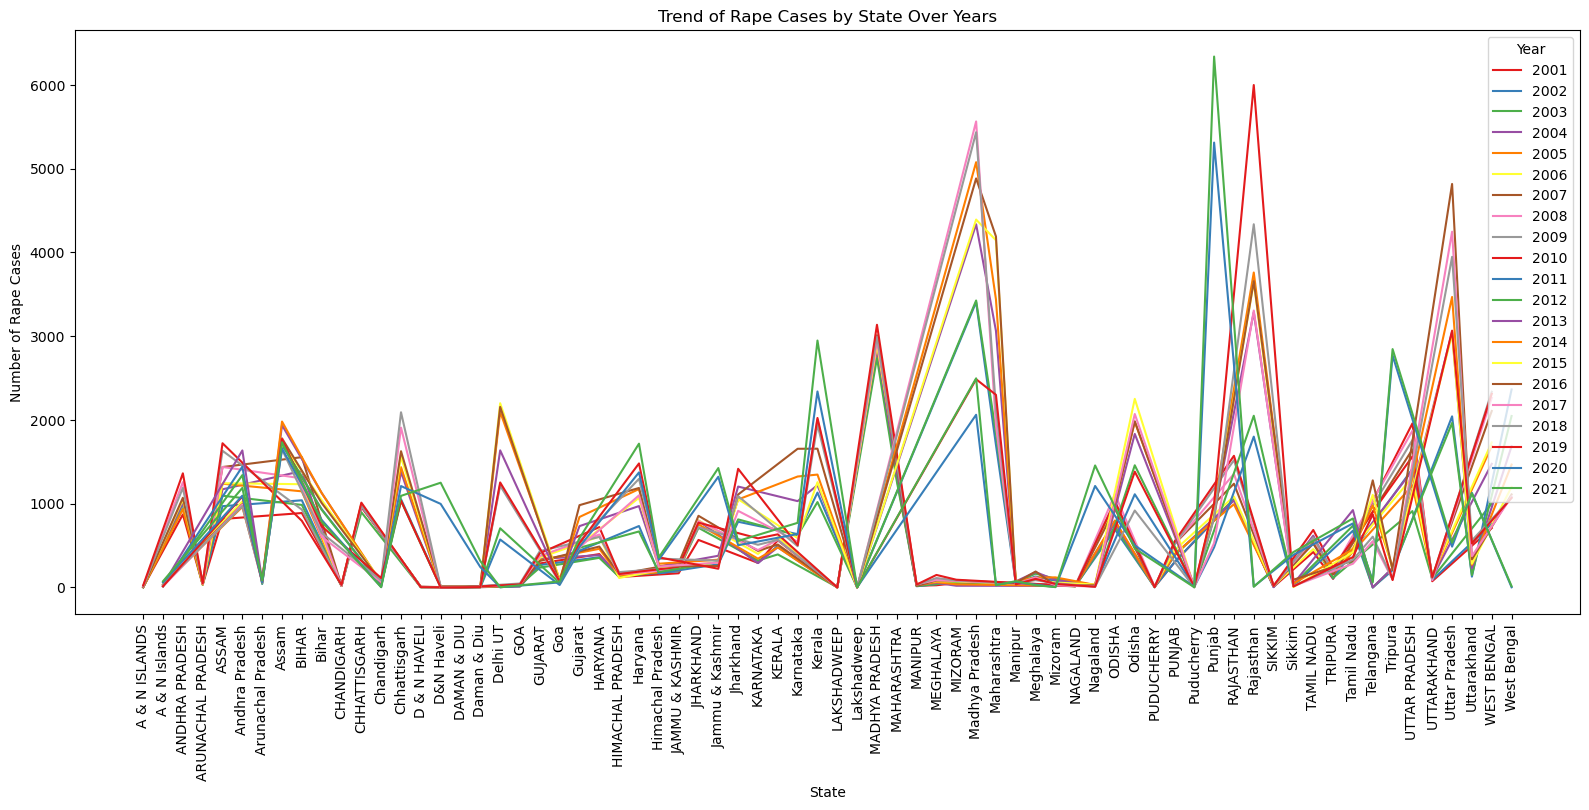

In [12]:
plt.figure(figsize=(16, 8))  
sns.lineplot(x='State', y='Rape', hue='Year', data=grouped_df, palette='Set1') 
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.title("Trend of Rape Cases by State Over Years")
plt.xlabel("State")
plt.ylabel("Number of Rape Cases")
plt.legend(title="Year", loc="upper right")  
plt.show()

In [13]:
# 2. Identify states with the highest and lowest dowry deaths each year
Dowry_death_Trend = df.groupby(['Year'])['DD'].sum().reset_index()

In [14]:
Dowry_death_Trend.sort_values(by = 'DD',ascending=False)

,Year,DD
13,2014,10050
10,2011,8618
9,2010,8248
8,2009,8242
11,2012,8233
12,2013,8083
7,2008,8043
6,2007,7955
14,2015,7634
15,2016,7621


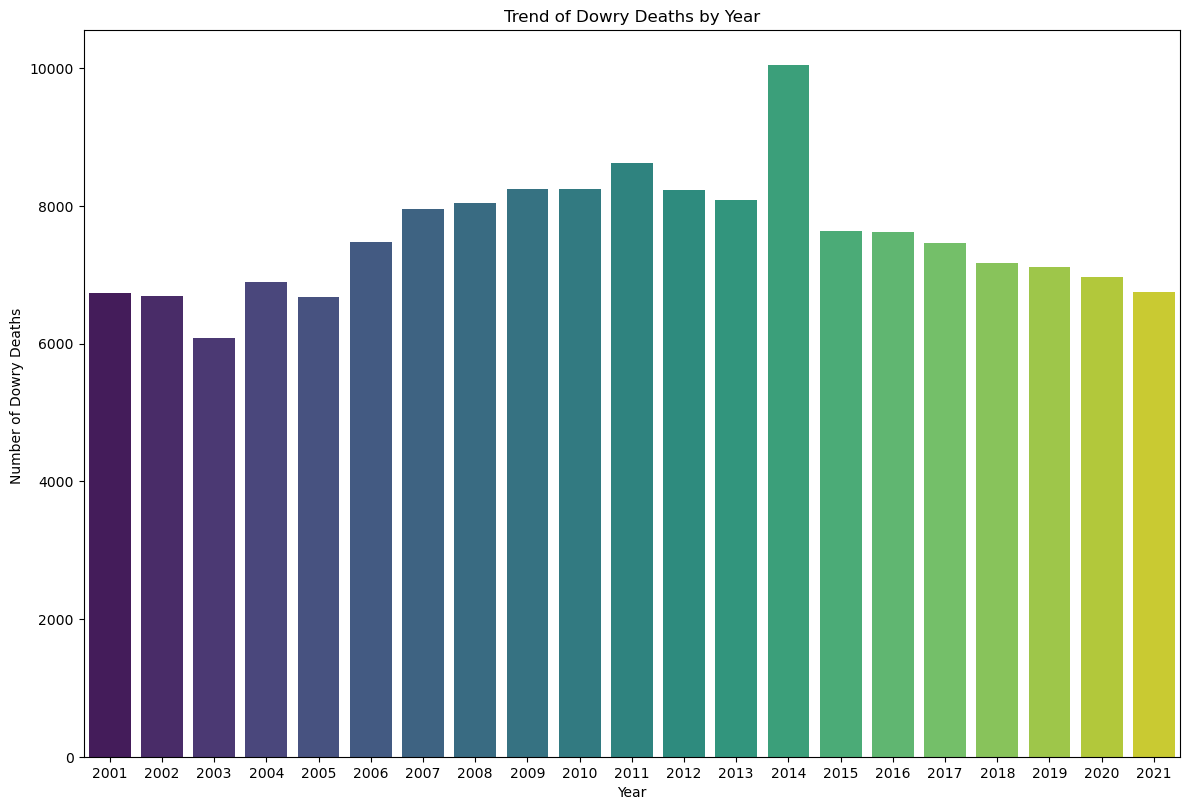

In [15]:
plt.figure(figsize=(12, 8))  
sns.barplot(x='Year', y='DD', data=Dowry_death_Trend, palette='viridis') 
plt.tight_layout()  
plt.title("Trend of Dowry Deaths by Year")
plt.xlabel("Year")
plt.ylabel("Number of Dowry Deaths ")
plt.show()

In [16]:
# 3.Study the yearly trend in domestic violence cases across India.
total_cases = df.groupby('Year')['DV'].sum().reset_index()

In [17]:
total_cases.sort_values(by = 'DV', ascending=False)

,Year,DV
20,2021,136234
18,2019,125298
13,2014,122877
12,2013,118866
14,2015,113403
19,2020,111549
15,2016,110378
11,2012,106527
16,2017,104551
17,2018,103272


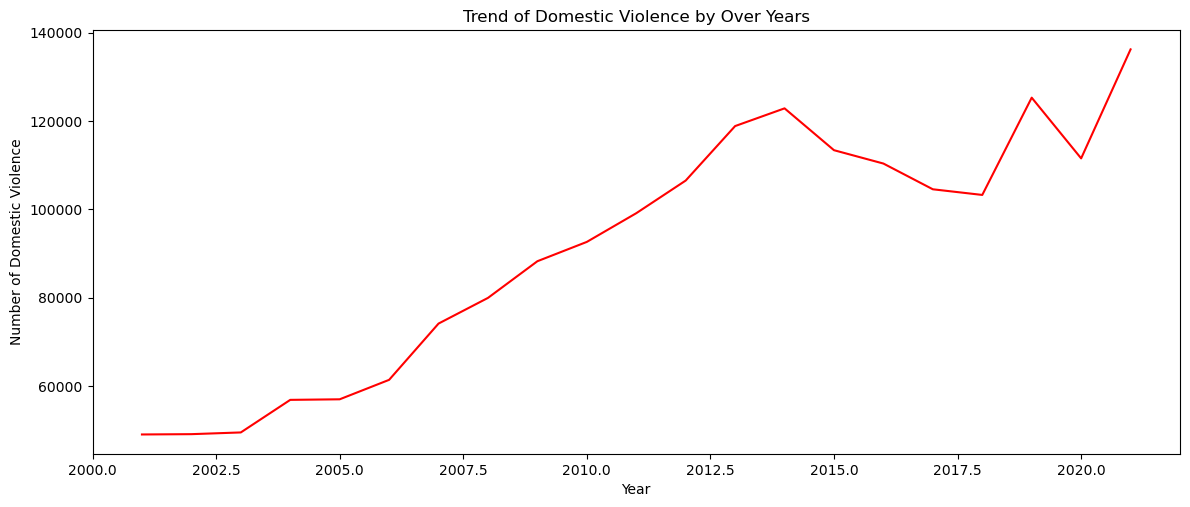

In [18]:
plt.figure(figsize=(12, 5))  
sns.lineplot(x='Year', y='DV', data=total_cases, palette='cividis', color = 'red')  
plt.tight_layout()  
plt.title("Trend of Domestic Violence by Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Domestic Violence")
plt.show()

### Compare the overall crime rates against women across states in the most recent year

In [20]:
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year]


In [21]:
crime_columns = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT'] 
latest_data['Total_Crimes'] = latest_data[crime_columns].sum(axis=1)

In [22]:
sorted_data = latest_data.sort_values(by = 'Total_Crimes', ascending= False)

In [23]:
sorted_data

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT,Total_Crimes
725,Tripura,2021,2845,10574,2222,9393,27,18375,12,43448
720,Punjab,2021,6337,5964,452,9079,73,16949,40,38894
713,Madhya Pradesh,2021,2496,7559,172,10568,1038,10095,95,32023
727,Uttarakhand,2021,1123,7376,454,2485,424,19952,50,31864
718,Nagaland,2021,1456,5175,293,14853,838,4889,31,27535
702,Assam,2021,1733,5739,198,4499,184,12950,22,25325
712,Kerala,2021,2947,6106,522,5760,250,7929,15,23529
723,Tamil Nadu,2021,823,1934,175,4365,775,9468,12,17552
700,Andhra Pradesh,2021,1188,613,108,5108,2370,7092,70,16549
707,Haryana,2021,1716,2958,275,2882,290,5755,28,13904


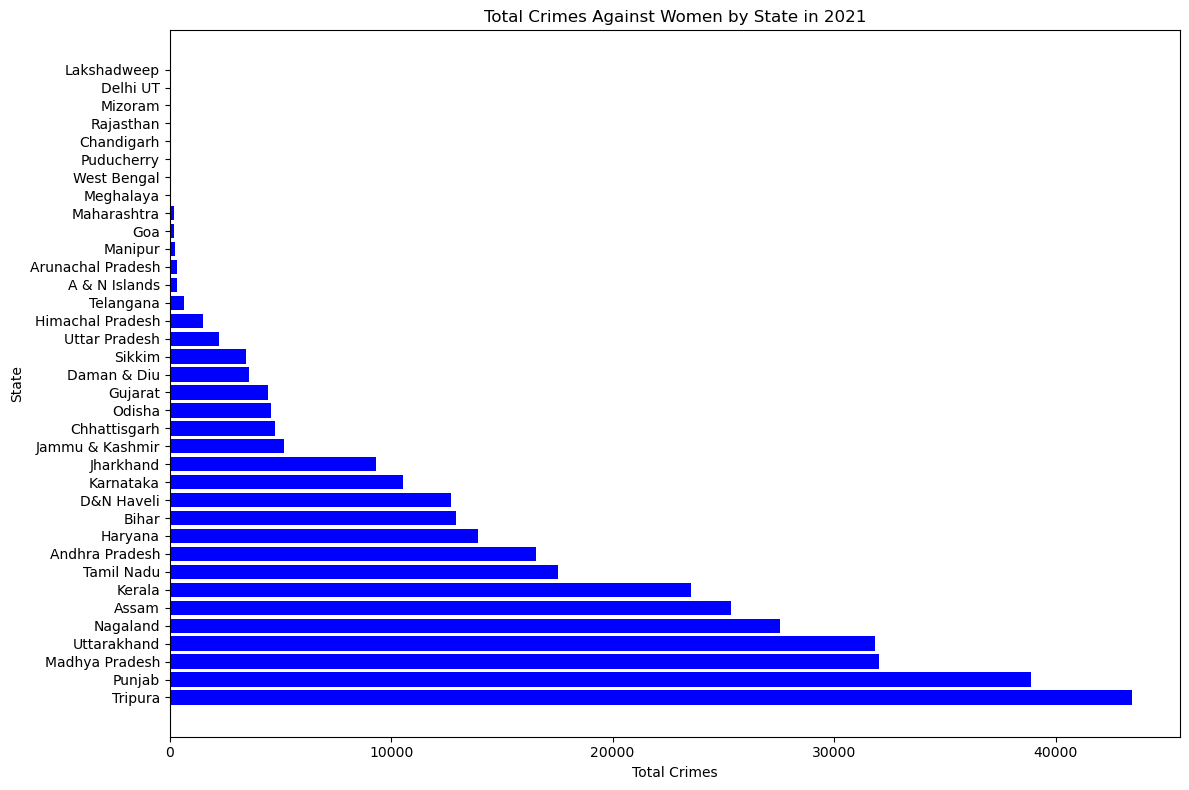

In [24]:
plt.figure(figsize=(12, 8))
plt.barh(sorted_data['State'], sorted_data['Total_Crimes'], color='blue')
plt.xlabel("Total Crimes")
plt.ylabel("State")
plt.title(f"Total Crimes Against Women by State in {latest_year}")
plt.tight_layout()
plt.show()

### 5. Determine states with consistently high/low kidnapping and assault cases over the years

In [26]:
res = df.groupby('State')['K&A'].agg(['mean', 'std']).reset_index()


In [27]:
highest_mean_states = res.nlargest(5, 'mean')  
lowest_mean_states = res.nsmallest(5, 'mean') 

In [28]:
print(highest_mean_states)

             State         mean          std
66   Uttar Pradesh  9245.545455  5055.132330
9            Bihar  5921.545455  1977.558918
7            Assam  5008.545455  1216.752511
42  Madhya Pradesh  4587.000000  2067.623418
43     Maharashtra  3460.090909  2794.185515


In [29]:
print(lowest_mean_states)

          State  mean       std
36  Lakshadweep   0.0  0.000000
35  LAKSHADWEEP   0.1  0.316228
41      MIZORAM   0.7  0.823273
16  DAMAN & DIU   1.3  0.948683
46      Mizoram   3.0  2.489980


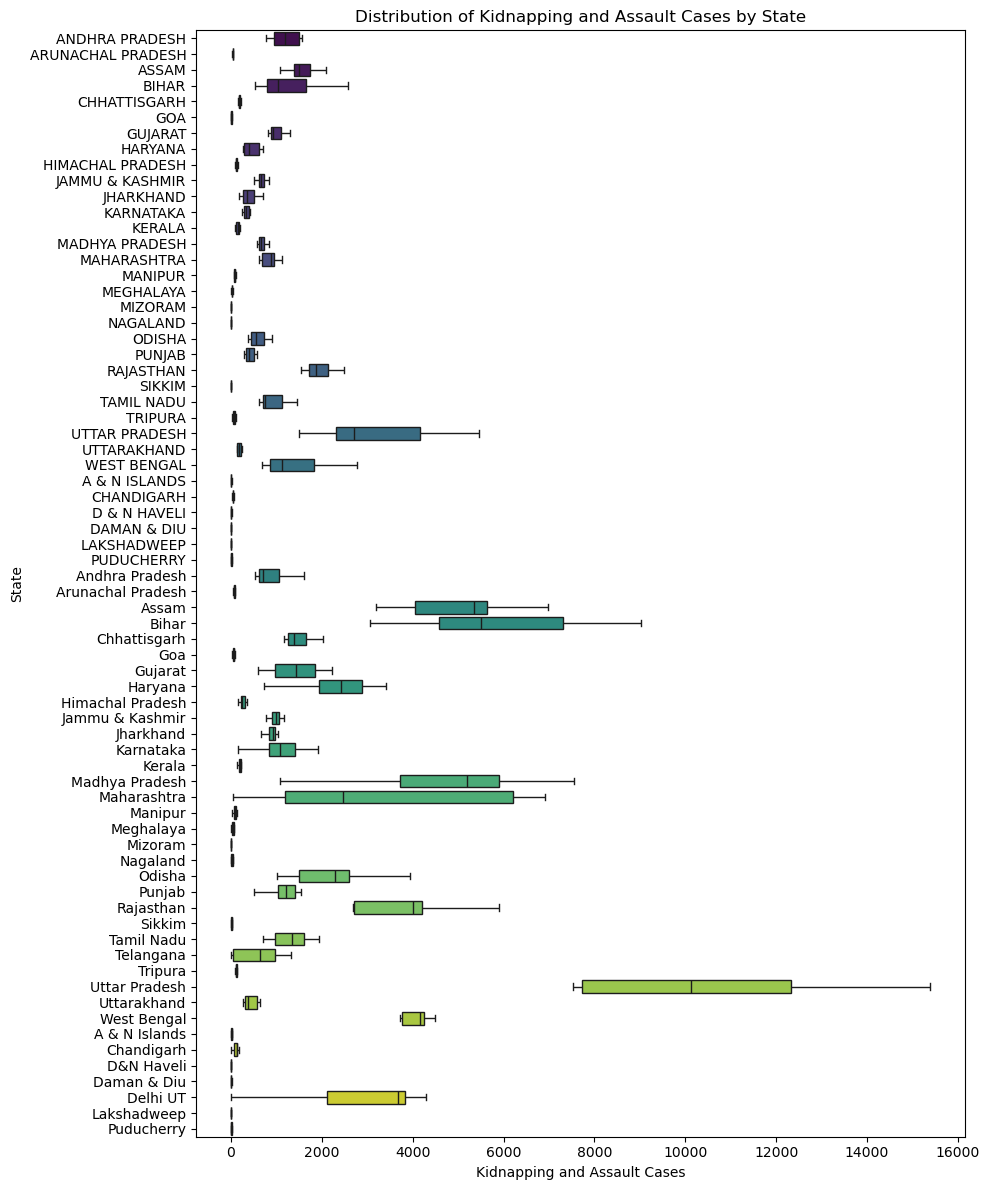

In [30]:

plt.figure(figsize=(10, 12))
sns.boxplot(x='K&A', y='State', data=df, palette='viridis', showfliers=False)
plt.title("Distribution of Kidnapping and Assault Cases by State")
plt.xlabel("Kidnapping and Assault Cases")
plt.ylabel("State")
plt.tight_layout()
plt.show()

###  6. Analyze state-wise variations in women trafficking cases over time

In [32]:
Wt_df = df.groupby(['State', 'Year'])['WT'].sum().reset_index()

In [33]:
Wt_df.sort_values(by = 'WT', ascending=False)

,State,Year,WT
642,Tamil Nadu,2013,549
641,Tamil Nadu,2012,500
51,Andhra Pradesh,2011,497
644,Tamil Nadu,2015,491
53,Andhra Pradesh,2013,489
...,...,...,...
328,KARNATAKA,2003,0
327,KARNATAKA,2002,0
326,KARNATAKA,2001,0
320,Jharkhand,2016,0


Correlation between DD and DV: 0.49


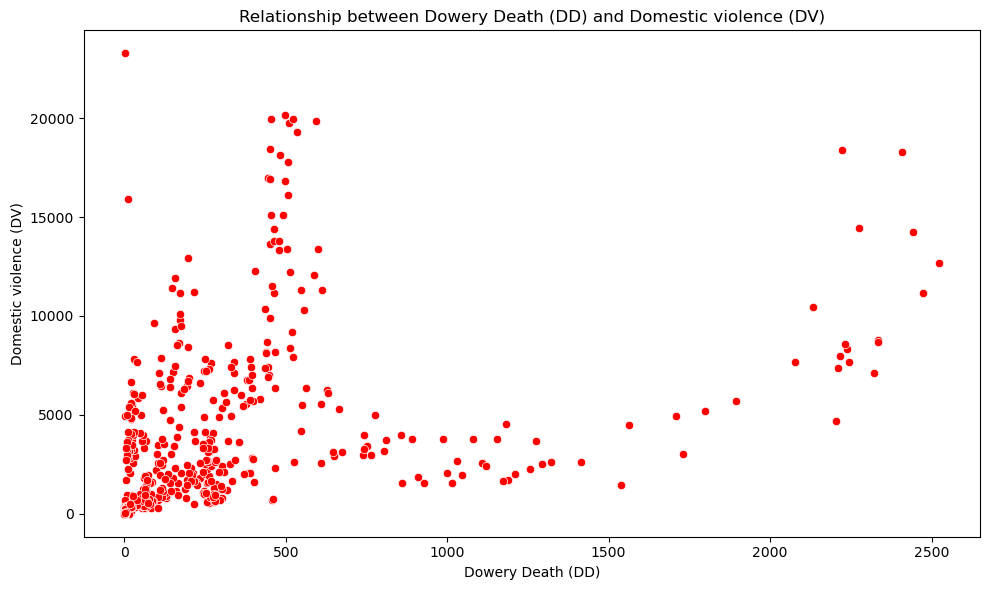

In [34]:
# 7. Correlation between dowry deaths and domestic violence
corr_of_DD_DV = df['DD'].corr(df['DV'])
print(f"Correlation between DD and DV: {corr_of_DD_DV:.2f}")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DD', y='DV', data=df, color='Red')
plt.title("Relationship between Dowery Death (DD) and Domestic violence (DV)")
plt.xlabel("Dowery Death (DD)")
plt.ylabel("Domestic violence (DV)")
plt.tight_layout()
plt.show()

Correlation between AoW and AoM: 0.52


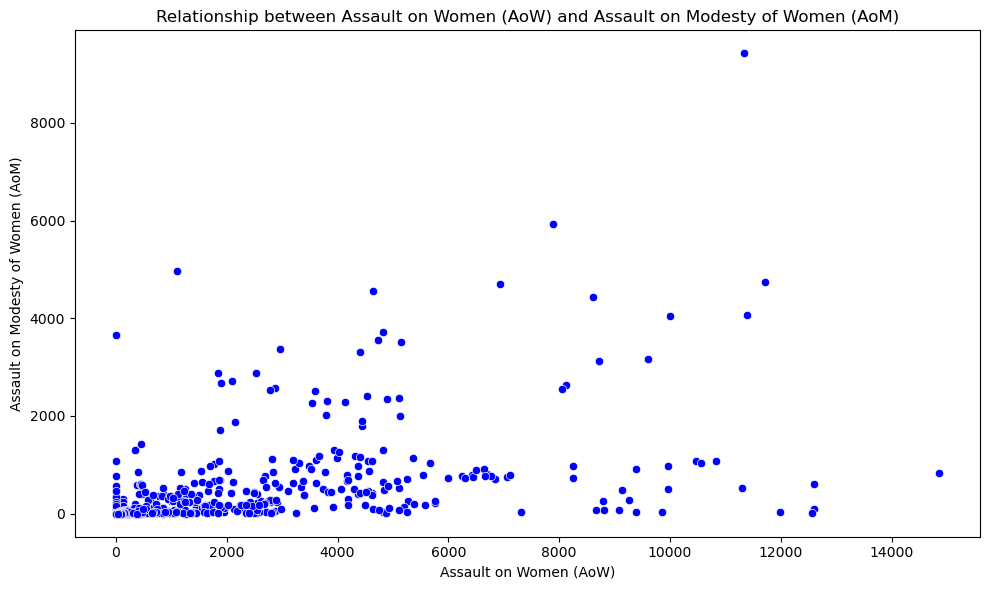

In [35]:
# 8. Relationship between assaults on women and modesty of women
correlation = df['AoW'].corr(df['AoM'])
print(f"Correlation between AoW and AoM: {correlation:.2f}")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AoW', y='AoM', data=df, color='blue')
plt.title("Relationship between Assault on Women (AoW) and Assault on Modesty of Women (AoM)")
plt.xlabel("Assault on Women (AoW)")
plt.ylabel("Assault on Modesty of Women (AoM)")
plt.tight_layout()
plt.show()


The reletition between Kidnapping and Assault and Women Trafficking 0.18


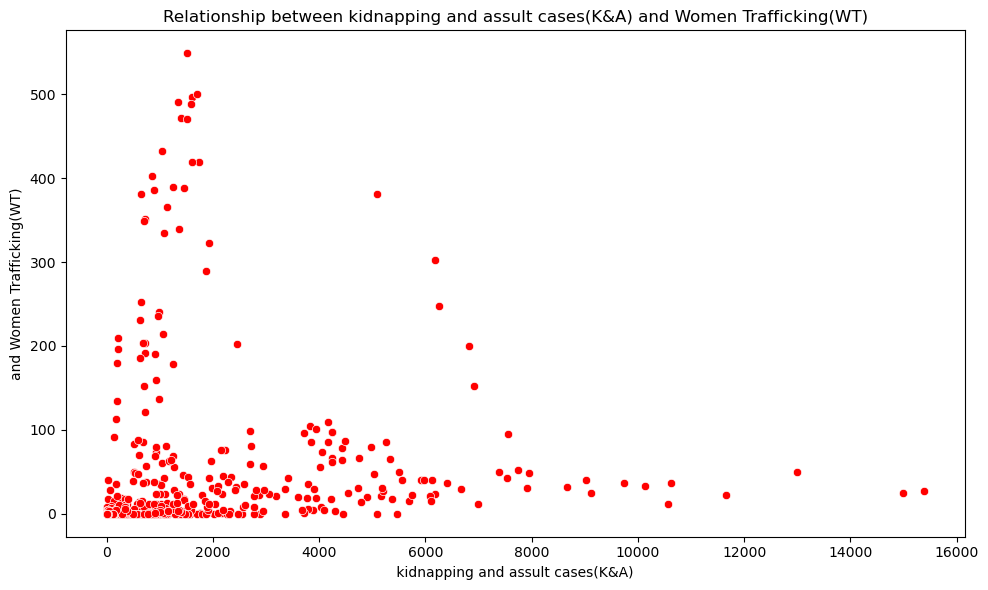

In [36]:
# 9 Study link between kidnapping & assault cases and women trafficking
corr_of_data = df['K&A'].corr(df['WT'])
print(f'The reletition between Kidnapping and Assault and Women Trafficking {corr_of_data:.2f}')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='K&A', y='WT', data=df, color='red')
plt.title("Relationship between kidnapping and assult cases(K&A) and Women Trafficking(WT)")
plt.xlabel(" kidnapping and assult cases(K&A) ")
plt.ylabel("and Women Trafficking(WT)")
plt.tight_layout()
plt.show()

